In [1]:
import pandas as pd

from data_tools.analysis.models import DataSet
from data_tools.link_predictor.predictor import LinkPredictor

/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/pydantic/_internal/_fields.py:198: UserWarning: Field name "schema" in "Source" shadows an attribute in parent "BaseResource"
  warnings.warn(


In [2]:
domain = "healthcare"
allergies = "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/allergies.csv"

In [3]:
df = pd.read_csv(allergies)

You can run the step you want Or run all at once

In [4]:
dataset_allergies = DataSet(df, "allergies")
dataset_allergies.profile().identify_datatypes().identify_keys().generate_glossary(domain=domain)

# Run all
# dataset_allergies.run(domain=domain)

/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
[!] Empty column encountered for allergies ==> stop ...
100%|██████████| 15/15 [00:24<00:00,  1.61s/it]


,column_name,business_name,table_name,null_count,count,distinct_count,uniqueness,completeness,sample_data,dtype_sample,ts,datatype_l1,datatype_l2,business_glossary,business_tags
0,start,start,allergies,0,794,179,0.225441,1.0,"[1962-10-12, 1914-07-20, 1954-04-20, 1984-03-3...","[2020-02-17, 1981-05-17, 1960-01-05, 1960-05-2...",0.010084,date & time,L2OutputTypes.dimension,Indicates the date and time when an allergy re...,"[Allergy Onset Date, Patient Medical History, ..."
1,stop,stop,allergies,794,794,0,0.000000,0.0,[],[],0.000727,others,L2OutputTypes.unknown,Indicates the conclusion or cessation of a spe...,"[EndDate, AllergyResolution, TreatmentStop]"
2,patient,patient,allergies,0,794,179,0.225441,1.0,"[066f03fb-a5aa-5b53-d4a6-b31f5b44a29f, 5a766b6...","[b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85, 0288c42...",0.008277,alphanumeric,L2OutputTypes.dimension,Identifies individuals associated with recorde...,"[Patient Identifier, Healthcare Record Linkage..."
3,encounter,encounter,allergies,0,794,179,0.225441,1.0,"[22607f79-051f-a910-9e78-bc61ce8ba513, 430d0b6...","[01efcc52-15d6-51e9-faa2-bee069fcbe44, 79de99b...",0.009618,alphanumeric,L2OutputTypes.dimension,Tracks the specific instance of interaction or...,"[Patient Encounter, Clinical Visit Identifier,..."
4,code,code,allergies,0,794,21,0.026448,1.0,"[111088007, 1191, 3718001, 84489001, 5640, 412...","[111088007, 84489001, 260147004, 264287008, 25...",0.009559,integer,L2OutputTypes.dimension,Identifies specific categories or types within...,"[Allergy Identifier, Medical Classification, C..."


# Run Link prediction

In [5]:
# all other tables
tables_path = {
    "careplans": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/careplans.csv",
    "claims": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/claims.csv",
    "claims_transactions": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/claims_transactions.csv",
    "conditions": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/conditions.csv",
    "devices": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/devices.csv",
    "encounters": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/encounters.csv",
    "imaging_studies": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/imaging_studies.csv",
    "immuizations": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/immuizations.csv",
    "medications": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/medications.csv",
    "observations": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/observations.csv",
    "organizations": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/organizations.csv",
    "patients": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/patients.csv",
    "payer_transitions": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/payer_transitions.csv",
    "payers": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/payers.csv",
    "procedures": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/procedures.csv",
    "providers": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/providers.csv",
    "supplies": "https://raw.githubusercontent.com/Intugle/data-tools/refs/heads/main/sample_data/healthcare/supplies.csv",
}

In [6]:
extra_tables = ["patients", "claims", "careplans", "claims_transactions", "medications"]

In [7]:
datasets = {"allergies": dataset_allergies}

for table in extra_tables:
    df = pd.read_csv(tables_path[table])

    dataset = DataSet(df, table)
    dataset.run(domain=domain)

    datasets[table] = dataset

/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 24%|██▍       | 6/25 [00:03<00:11,  1.67it/s][!] Error while llm response parsing: Got invalid JSON object. Error: Expecting ',' delimiter: line 2 column 27 (char 28)
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
[*] patients:   0%|          | 0/1 [00:00<?, ?it/s]/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/src/data_tools/core/pipeline/key_identification/ki.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [8]:
# save all datasets metadata to YAML files
for ds in datasets.values():
    ds.save_yaml()

In [10]:
# Initialize the predictor
predictor = LinkPredictor(list(datasets.values()))

# Run the predictioLinkPredictionSaver,n
results = predictor.predict()

Dataset 'allergies' is missing key identification. Running prerequisite analysis...


/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
[!] Empty column encountered for allergies ==> stop ...
  0%|          | 0/15 [00:00<?, ?it/s][!] Error while llm response parsing: Got invalid JSON object. Error: Expecting ',' delimiter: line 2 column 27 (char 28)
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE 
 13%|█▎        | 2/15 [00:00<00:04,  2.77it/s][!] Error while llm response parsing: Got invalid JSON object. Error: Expecting ',' delimiter: line 2 column 25 (char 26)
For troubleshooting, visit: https://python.langchain.com/

Dataset 'patients' already processed. Skipping analysis.
Dataset 'claims' already processed. Skipping analysis.
Dataset 'careplans' already processed. Skipping analysis.
Dataset 'claims_transactions' already processed. Skipping analysis.
Dataset 'medications' is missing key identification. Running prerequisite analysis...



/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/juhel-phanju/Documents/intugle/projects/data-tools/data-tools/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 13/13 [00:07<00:00,  1.66it/s]


LinkPredictor initialized with datasets: ['allergies', 'patients', 'claims', 'careplans', 'claims_transactions', 'medications']

--- Comparing 'allergies' <=> 'patients' ---


[*] allergies <==> patients Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


Found 1 potential link(s).

--- Comparing 'allergies' <=> 'claims' ---


[*] allergies <==> claims Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'careplans' ---


[*] allergies <==> careplans Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'claims_transactions' ---


[*] allergies <==> claims_transactions Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


No links found for this pair.

--- Comparing 'allergies' <=> 'medications' ---


[*] allergies <==> medications Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.88s/it]


No links found for this pair.

--- Comparing 'patients' <=> 'claims' ---


[*] patients <==> claims Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


Found 1 potential link(s).

--- Comparing 'patients' <=> 'careplans' ---


[*] patients <==> careplans Runs:1: 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


Found 1 potential link(s).

--- Comparing 'patients' <=> 'claims_transactions' ---


[*] patients <==> claims_transactions Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


Found 1 potential link(s).

--- Comparing 'patients' <=> 'medications' ---


[*] patients <==> medications Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


Found 1 potential link(s).

--- Comparing 'claims' <=> 'careplans' ---


[*] claims <==> careplans Runs:1: 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]


No links found for this pair.

--- Comparing 'claims' <=> 'claims_transactions' ---


[*] claims <==> claims_transactions Runs:1: 100%|██████████| 1/1 [00:19<00:00, 19.89s/it]


Found 1 potential link(s).

--- Comparing 'claims' <=> 'medications' ---


[*] claims <==> medications Runs:1: 100%|██████████| 1/1 [00:16<00:00, 16.97s/it]


No links found for this pair.

--- Comparing 'careplans' <=> 'claims_transactions' ---


[*] careplans <==> claims_transactions Runs:1: 100%|██████████| 1/1 [00:04<00:00,  4.32s/it]


No links found for this pair.

--- Comparing 'careplans' <=> 'medications' ---


[*] careplans <==> medications Runs:1: 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]


Found 1 potential link(s).

--- Comparing 'claims_transactions' <=> 'medications' ---


[*] claims_transactions <==> medications Runs:1: 100%|██████████| 1/1 [00:04<00:00,  4.08s/it]

No links found for this pair.


In [11]:

results.links

[PredictedLink(from_dataset='allergies', from_column='patient', to_dataset='patients', to_column='id'),
 PredictedLink(from_dataset='patients', from_column='id', to_dataset='claims', to_column='patientid'),
 PredictedLink(from_dataset='patients', from_column='id', to_dataset='careplans', to_column='patient'),
 PredictedLink(from_dataset='patients', from_column='id', to_dataset='claims_transactions', to_column='patientid'),
 PredictedLink(from_dataset='patients', from_column='id', to_dataset='medications', to_column='patient'),
 PredictedLink(from_dataset='claims', from_column='id', to_dataset='claims_transactions', to_column='claimid'),
 PredictedLink(from_dataset='careplans', from_column='encounter', to_dataset='medications', to_column='encounter')]

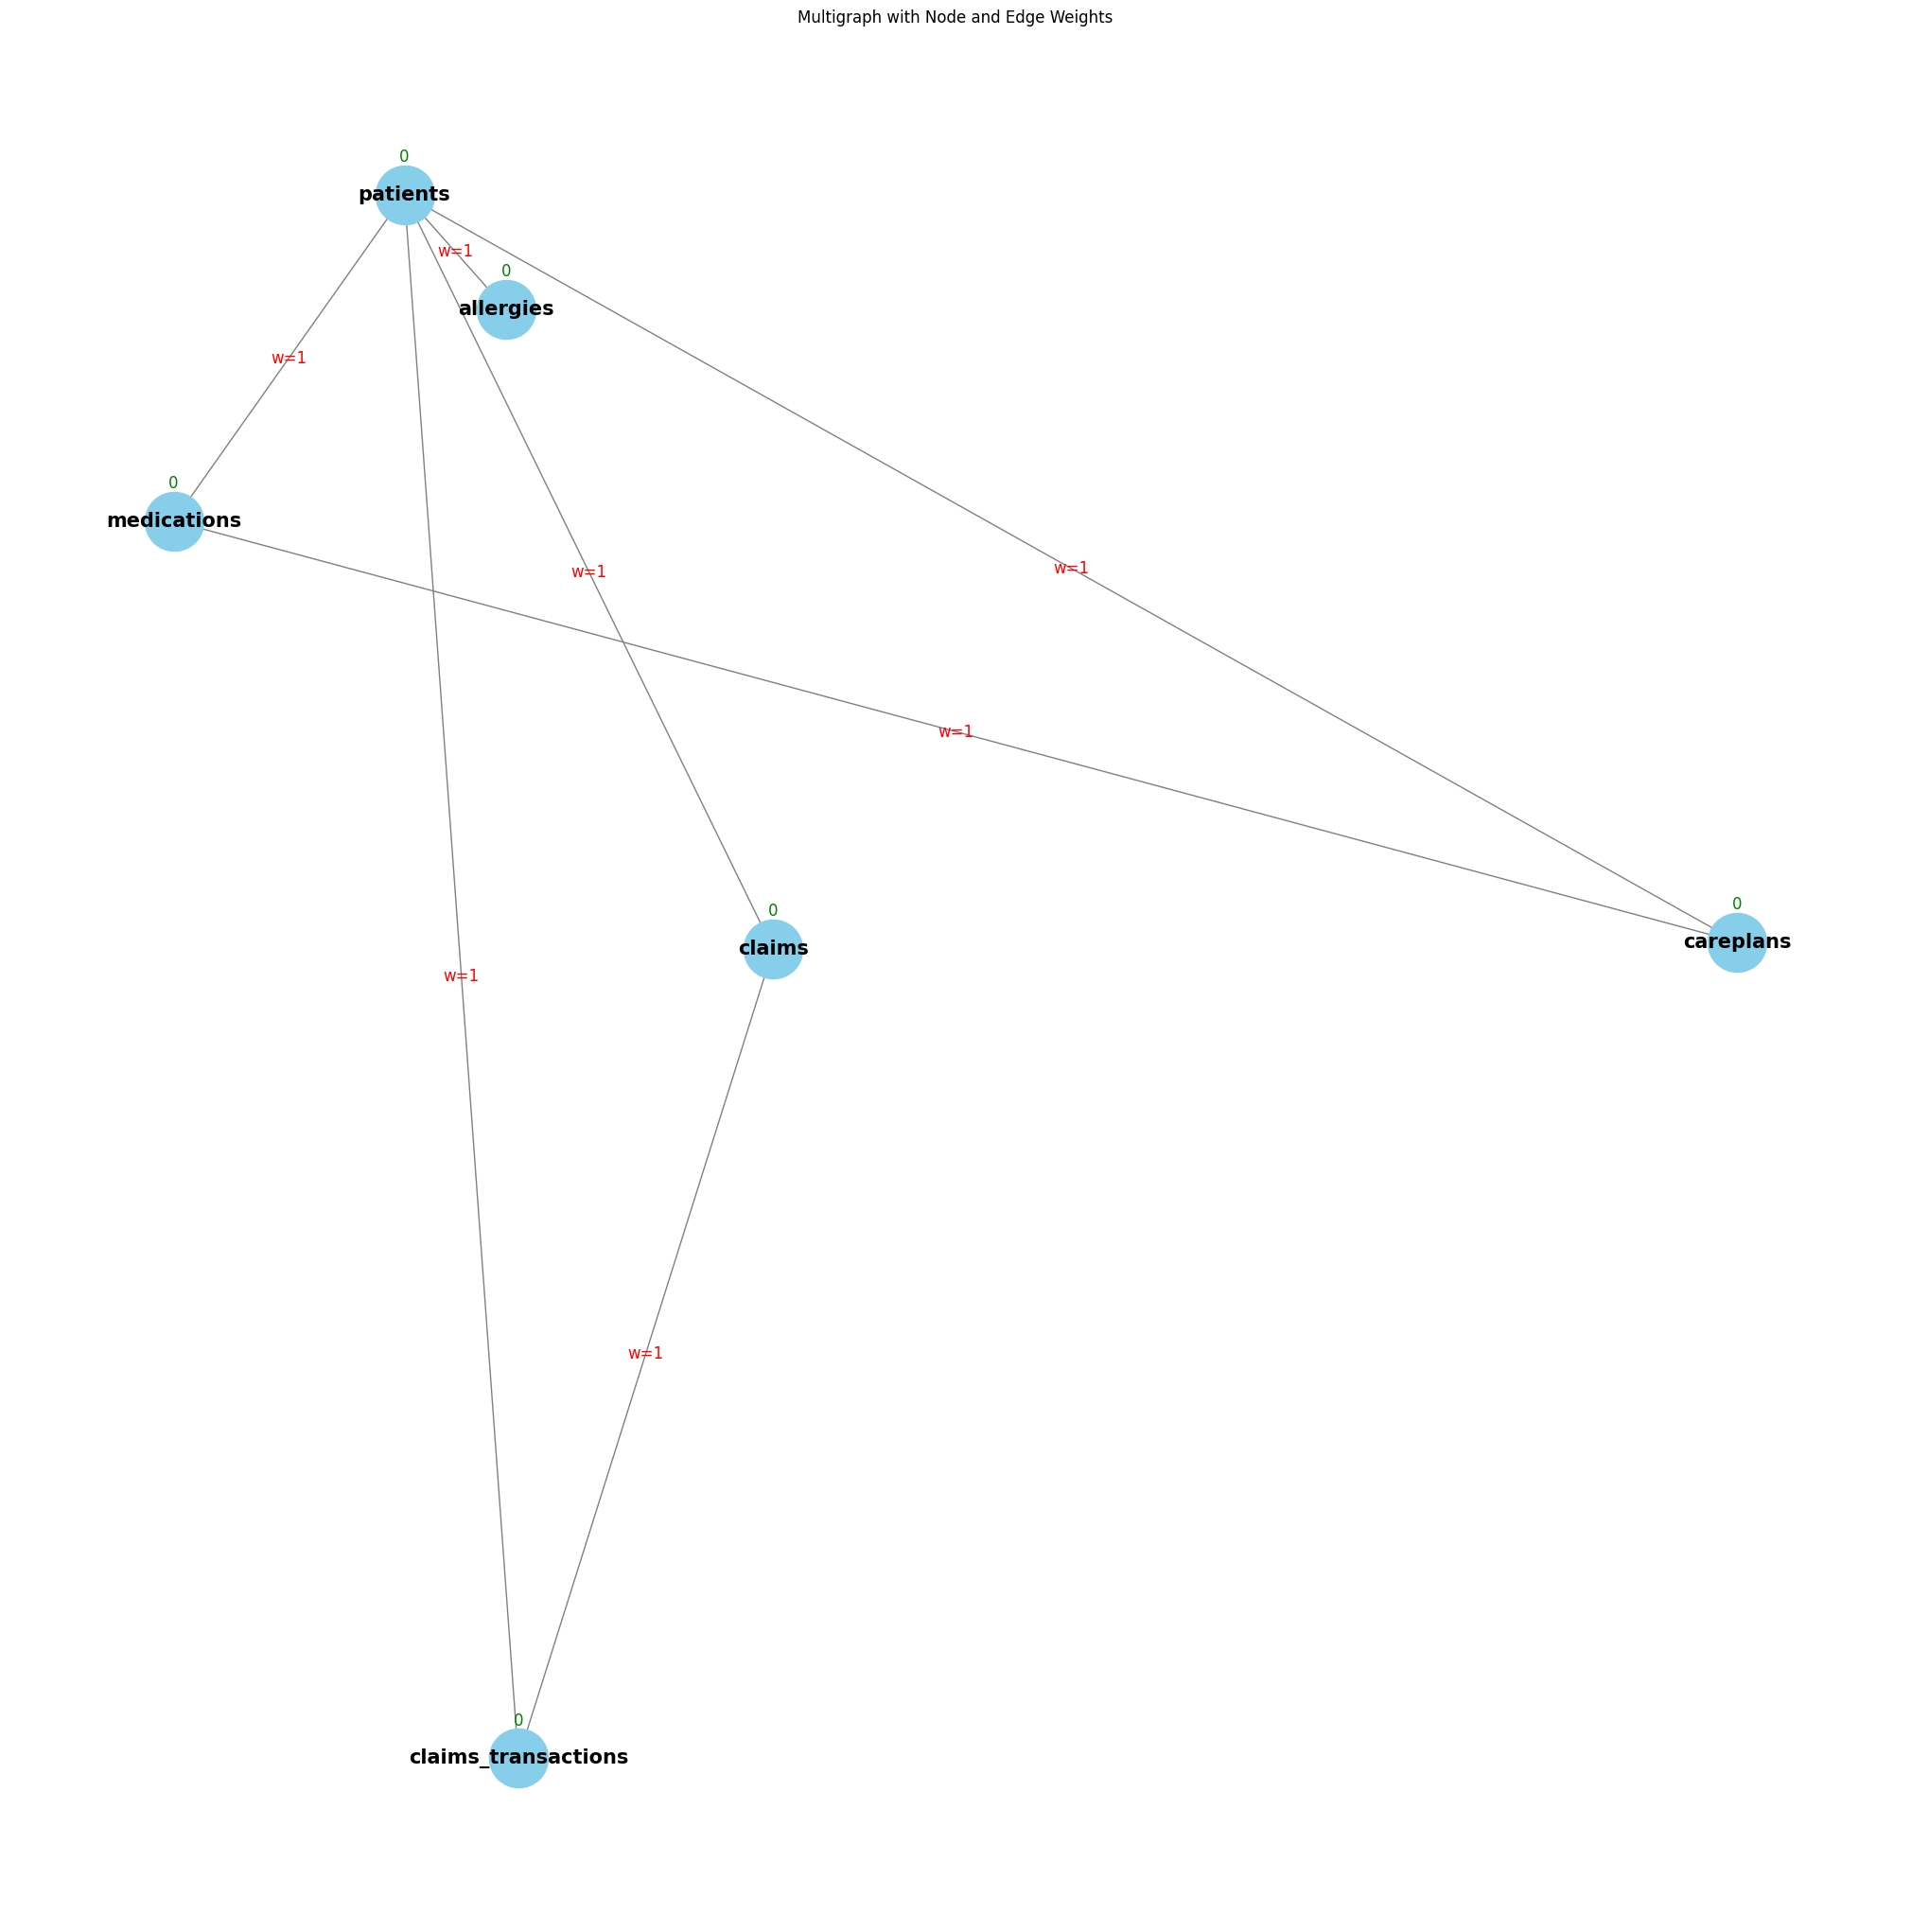

In [12]:

results.show_graph()

In [13]:
results.save_yaml("__new_relationship__.yml")